# Example of using PyDDM

## Importing the necessary modules

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np #numerical python used for working with arrays, mathematical operations
import xarray as xr #package for labeling and adding metadata to multi-dimensional arrays

import sys
usernm = "rmcgorty"
sys.path.append("C:/Users/%s/Documents/GitHub/PyDDM/PyDDM" % usernm) #must point to the PyDDM folder
### If you don't have PyDDM, get it here: https://github.com/rmcgorty/PyDDM
import ddm_analysis_and_fitting as ddm

import pickle #for saving data

## Example data -- 1 micron beads with stage moving at 7 microns/s

### Loading data and analysis parameters

In [57]:
import yaml
ddm_analysis_parameters_str = """
DataDirectory: './'
FileName: '1um_Beads_7ums.tif'
Metadata:
  pixel_size: 0.186 # size of pixel in um
  frame_rate: 45.4 #frames per second
Analysis_parameters:
  starting_frame_number: 0
  number_lag_times: 30
  last_lag_time: 600
  binning: yes
  bin_size: 2
  use_windowing_function: yes
  overlap_method: 1
  number_differences_max: 150
Fitting_parameters:
  model: 'DDM Matrix - Single Exponential'
  Tau: [1.0, 0.001, 10]
  StretchingExp: [1.0, 0.9, 2.1]
  Amplitude: [1e2, 1, 1e6]
  Background: [2.5e4, 0, 1e7]
  Good_q_range: [5, 20]
  Auto_update_good_q_range: True
"""
parameters_as_dictionary = yaml.safe_load(ddm_analysis_parameters_str)
ddm_calc = ddm.DDM_Analysis(parameters_as_dictionary)

Provided metadata: {'pixel_size': 0.186, 'frame_rate': 45.4}
Image shape: 2000-by-128-by-128
Number of frames to use for analysis: 2000
Maximum lag time (in frames): 600
Number of lag times to compute DDM matrix: 30
Using the full frame, dimensions: 128-by-128.
Applying windowing function...
Applying binning...
Dimensions after binning (2000, 64, 64), the new pixel size 0.372


### Calculating the DDM matrix

The file ./1um_Beads_7ums_ddmmatrix.nc already exists. So perhaps the DDM matrix was calculated already?
Do you still want to calculate the DDM matrix? (y/n): y


2022-06-12 15:19:17,579 - DDM Calculations - Running dt = 1...
2022-06-12 15:19:18,202 - DDM Calculations - Running dt = 5...
2022-06-12 15:19:18,789 - DDM Calculations - Running dt = 11...
2022-06-12 15:19:19,458 - DDM Calculations - Running dt = 24...
2022-06-12 15:19:20,104 - DDM Calculations - Running dt = 51...
2022-06-12 15:19:20,730 - DDM Calculations - Running dt = 110...
2022-06-12 15:19:21,324 - DDM Calculations - Running dt = 234...
2022-06-12 15:19:21,890 - DDM Calculations - Running dt = 497...


DDM matrix took 4.569823503494263 seconds to compute.
 Background estimate ± std is 2.06 ± 0.12


<xarray.Dataset>
Dimensions:           (lagtime: 30, q_y: 64, q_x: 64, q: 32, y: 64, x: 64, frames: 30)
Coordinates:
  * lagtime           (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
    framelag          (frames) int32 1 2 3 4 5 6 7 ... 234 282 341 411 497 599
  * q_y               (q_y) float64 -8.445 -8.181 -7.917 ... 7.653 7.917 8.181
  * q_x               (q_x) float64 -8.445 -8.181 -7.917 ... 7.653 7.917 8.181
  * q                 (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * y                 (y) int32 0 1 2 3 4 5 6 7 8 ... 55 56 57 58 59 60 61 62 63
  * x                 (x) int32 0 1 2 3 4 5 6 7 8 ... 55 56 57 58 59 60 61 62 63
Dimensions without coordinates: frames
Data variables:
    ddm_matrix_full   (lagtime, q_y, q_x) float64 0.4972 0.526 ... 0.5529 0.5726
    ddm_matrix        (lagtime, q) float64 0.0 11.94 16.09 ... 1.934 1.776 1.671
    first_image       (y, x) float64 1.185e-06 4.338e-06 ... 4.028e-06 1.056e-06
    alignment_factor  (lagtime, q) float64 nan 6.123e-17 ... -0.132 -0.1375
    avg_image_ft      (q) float64 0.0 5.491e+05 5.108e+04 ... 1.108 1.026 0.9565
    num_pairs_per_dt  (lagtime) int32 286 286 286 286 285 ... 277 265 251 281
    B                 float64 2.06
    B_std             float64 0.1239
    Amplitude         (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    ISF               (lagtime, q) float64 0.0 1.0 0.9999 ... -31.62 -1.647
Attributes: (12/21)
    units:                   Intensity
    lagtime:                 sec
    q:                       μm$^{-1}$
    x:                       pixels
    y:                       pixels
    info:                    ddm_matrix is the averages of FFT difference ima...
    ...                      ...
    last_lag_time:           600
    binning:                 True
    bin_size:                2
    use_windowing_function:  True
    overlap_method:          1
    number_differences_max:  150

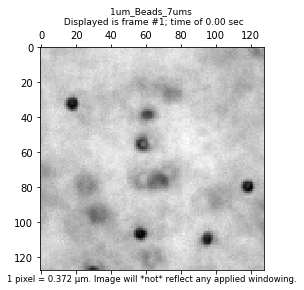

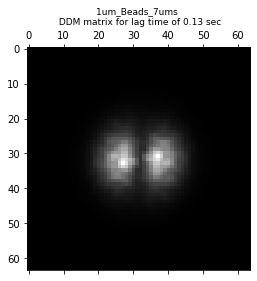

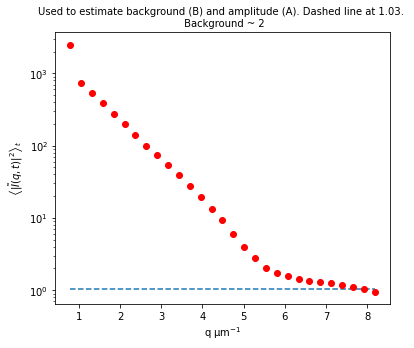

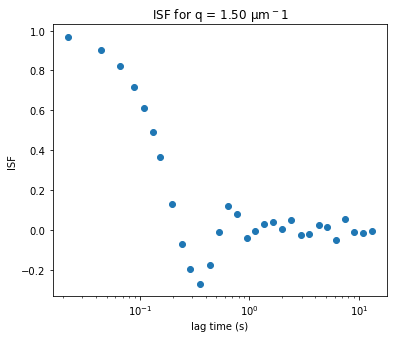

In [58]:
ddm_calc.calculate_DDM_matrix()

### Fitting the DDM matrix

In [59]:
ddm.print_fitting_models()

1: 'DDM Matrix - Single Exponential'
2: 'DDM Matrix - Double Exponential'
3: 'DDM Matrix - Exponential and Ballistic'
4: 'DDM Matrix - Ballistic'
5: 'DDM Matrix - Double Ballistic'
6: 'DDM Matrix - Single Exponential - NonErgodic'
7: 'DDM Matrix - Polydisperse'
8: 'ISF - Single Exponential'
9: 'ISF - Double Exponential'
10: 'ISF - Exponential and Ballistic'
11: 'ISF - Ballistic'
12: 'ISF - Double Ballistic'
13: 'ISF - Single Exponential - NonErgodic'


,Initial guess,Minimum,Maximum
Amplitude,100.0,1.000,1000000.0
Tau,1.0,0.001,10.0
Background,25000.0,0.000,10000000.0
StretchingExp,1.0,0.900,2.1


Loading file ./1um_Beads_7ums_ddmmatrix.nc ...
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit01 - single exponential - first try'.
In function 'get_tau_vs_q_fit', using new tau...
In hf.plot_one_tau_vs_q function, using new tau... 


<xarray.Dataset>
Dimensions:          (parameter: 4, q: 32, lagtime: 30)
Coordinates:
  * parameter        (parameter) <U13 'Amplitude' 'Tau' ... 'StretchingExp'
  * q                (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * lagtime          (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
Data variables:
    parameters       (parameter, q) float64 1.0 5.068e+03 3.598e+03 ... 0.9 0.9
    theory           (lagtime, q) float64 2.631e-06 41.94 12.55 ... 2.425 2.299
    isf_data         (lagtime, q) float64 0.0 1.0 0.9999 ... 1.811 -31.62 -1.647
    ddm_matrix_data  (lagtime, q) float64 0.0 11.94 16.09 ... 1.934 1.776 1.671
    A                (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    B                float64 2.06
Attributes: (12/18)
    model:                          DDM Matrix - Single Exponential
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 100.0, 'limits': [1.0...
    effective_diffusion_coeff:      4.470346312139371
    tau_vs_q_slope:                 [-1.1711042]
    msd_alpha:                      [1.70778996]
    ...                             ...
    DataDirectory:                  ./
    FileName:                       1um_Beads_7ums.tif
    pixel_size:                     0.186
    frame_rate:                     45.4
    BackgroundMethod:               0
    OverlapMethod:                  1

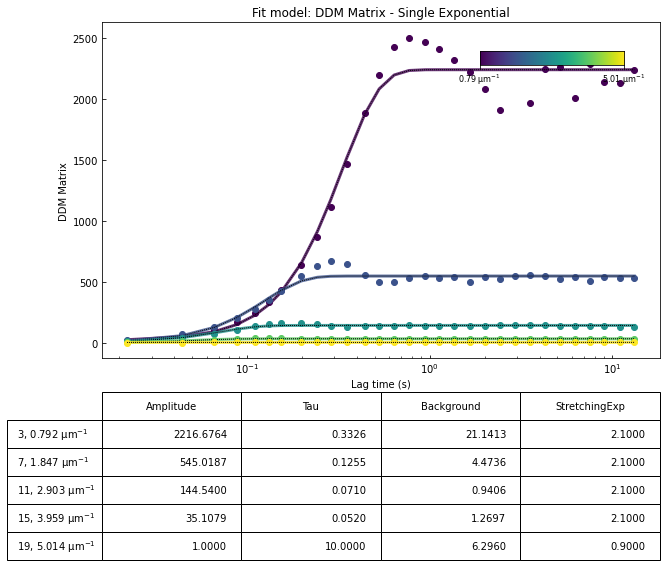

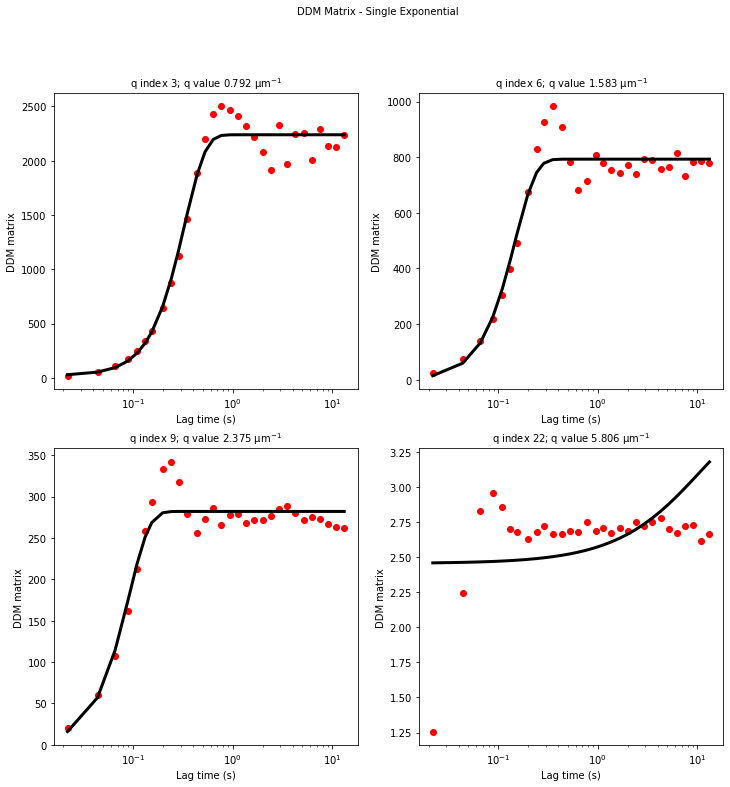

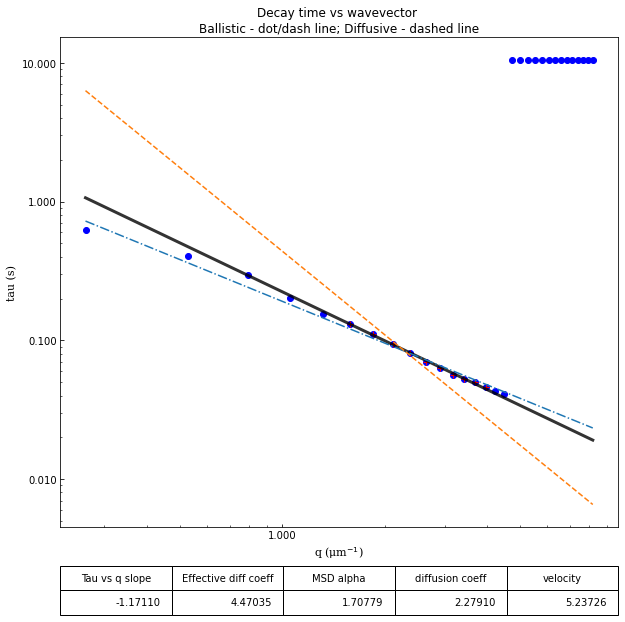

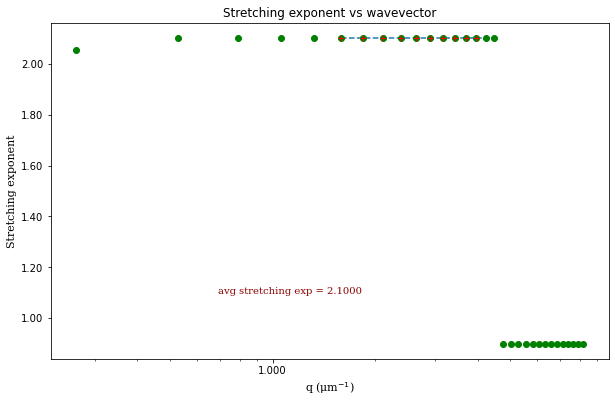

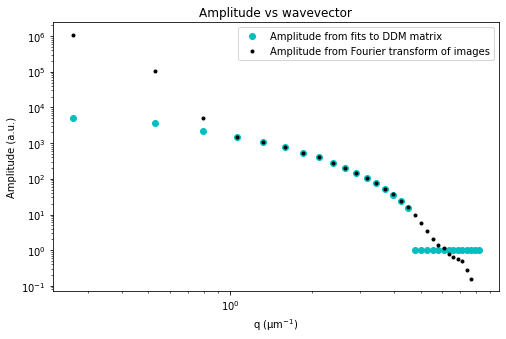

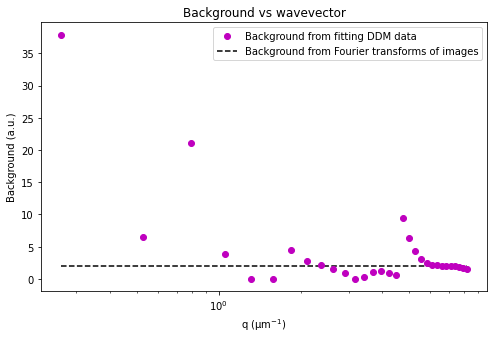

In [60]:
ddm_fit = ddm.DDM_Fit(parameters_as_dictionary)
fit01 = ddm_fit.fit(name_fit = 'fit01 - single exponential - first try', display_table=False)
ddm.fit_report(fit01, q_indices=[3,6,9,22], forced_qs=[6,16], use_new_tau=True, show=True)

### Inspecting fits

<IPython.core.display.Javascript object>


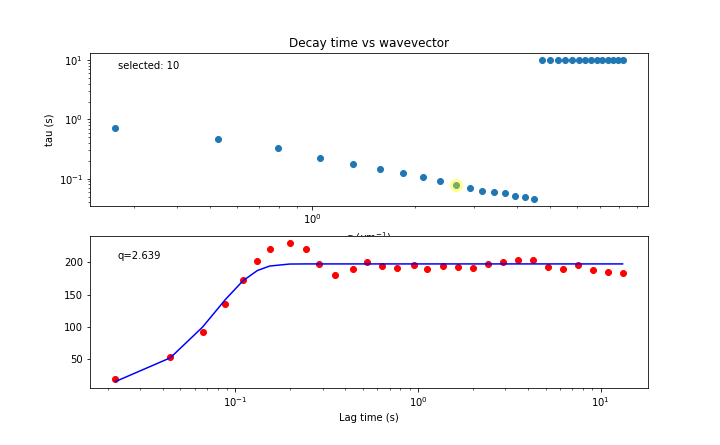

Click on a point in the tau vs q plot to see a fit.
Or press 'N' or 'P' to display next or previous fit.


Text(0, 0.5, 'tau (s)')

In [61]:
%matplotlib notebook
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10,10/1.618))
browser = ddm.Browse_DDM_Fits(fig, ax, ax2, fit01)

fig.canvas.mpl_connect('pick_event', browser.on_pick)
fig.canvas.mpl_connect('key_press_event', browser.on_press)

ax.set_title('Decay time vs wavevector')
ax.set_xlabel("q ($\mu$m$^{-1}$)")
ax.set_ylabel("tau (s)")

In [23]:
%matplotlib inline

### Trying a different model

In [24]:
ddm_fit.reload_fit_model_by_name("DDM Matrix - Ballistic")

Need to specify SchulzNum.


,Initial guess,Minimum,Maximum
Amplitude,100.0,1.000,1000000.0
Background,25000.0,0.000,10000000.0
Tau,1.0,0.001,10.0
SchulzNum,0.0,0.000,0.0


In [25]:
ddm_fit.set_parameter_initial_guess("SchulzNum", 1e5)
ddm_fit.set_parameter_bounds("SchulzNum", [1e1,1e9])

Parameter 'SchulzNum' set to 100000.0.
Parameter 'SchulzNum' lower limit set to 10.0.
Parameter 'SchulzNum' upper limit set to 1000000000.0.


Fit is saved in fittings dictionary with key 'fit02 - ballistic-type model - second try'.


<xarray.Dataset>
Dimensions:          (parameter: 4, q: 32, lagtime: 30)
Coordinates:
  * parameter        (parameter) <U10 'Amplitude' 'Background' 'Tau' 'SchulzNum'
  * q                (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * lagtime          (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
Data variables:
    parameters       (parameter, q) float64 1.0 4.753e+03 ... 3.491e+07
    theory           (lagtime, q) float64 8.086e-07 90.86 147.6 ... 2.135 2.009
    isf_data         (lagtime, q) float64 0.0 1.0 0.9999 ... 1.811 -31.62 -1.647
    ddm_matrix_data  (lagtime, q) float64 0.0 11.94 16.09 ... 1.934 1.776 1.671
    A                (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    B                float64 2.06
Attributes: (12/18)
    model:                          DDM Matrix - Ballistic
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 100.0, 'limits': [1.0...
    effective_diffusion_coeff:      8.145660145632856
    tau_vs_q_slope:                 [-1.06049371]
    msd_alpha:                      [1.88591406]
    ...                             ...
    DataDirectory:                  ./
    FileName:                       1um_Beads_7ums.tif
    pixel_size:                     0.186
    frame_rate:                     45.4
    BackgroundMethod:               0
    OverlapMethod:                  1

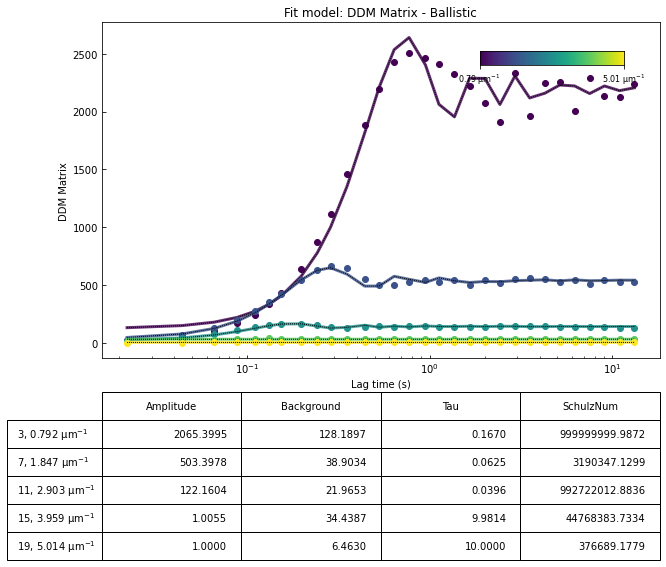

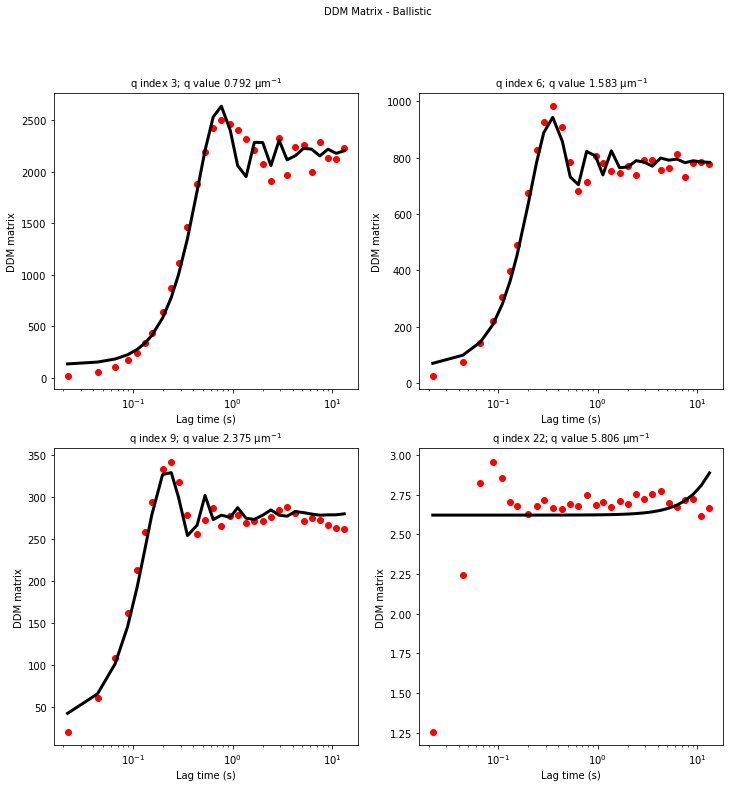

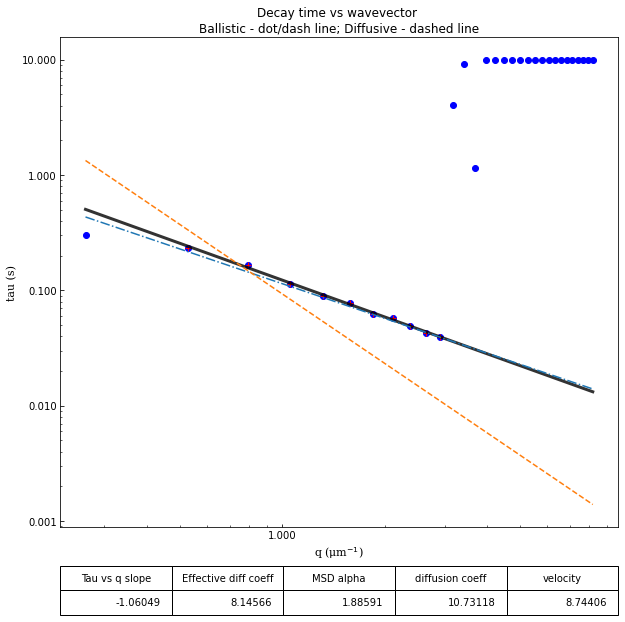

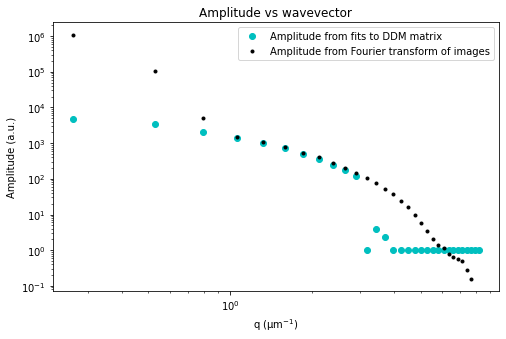

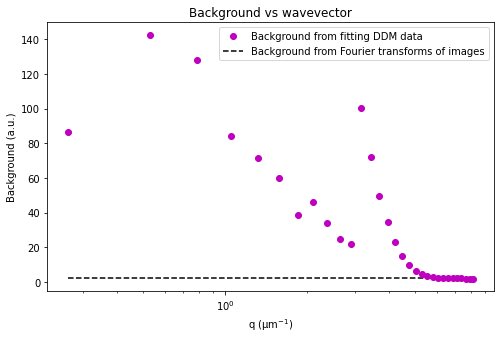

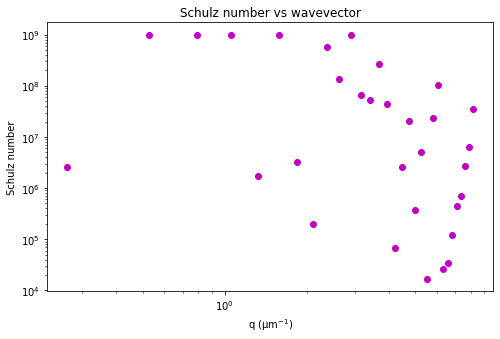

In [26]:
fit02 = ddm_fit.fit(name_fit = 'fit02 - ballistic-type model - second try', display_table=False)
ddm.fit_report(fit02, q_indices=[3,6,9,22], forced_qs=[2,12], use_new_tau=True, show=True)

### Inspecting this fit

<IPython.core.display.Javascript object>


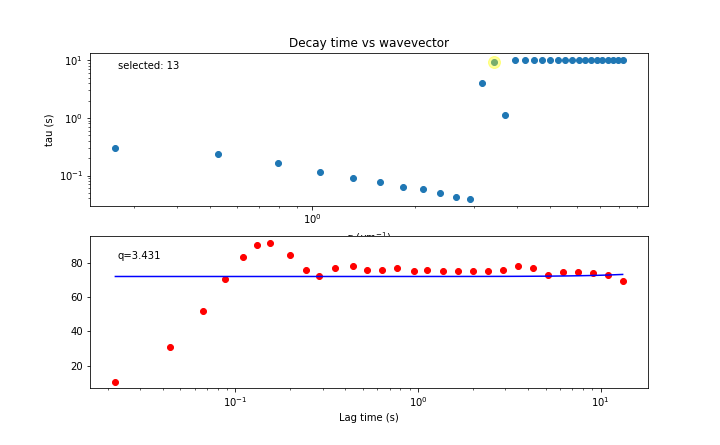

Click on a point in the tau vs q plot to see a fit.
Or press 'N' or 'P' to display next or previous fit.


Text(0, 0.5, 'tau (s)')

In [27]:
%matplotlib notebook
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10,10/1.618))
browser = ddm.Browse_DDM_Fits(fig, ax, ax2, fit02)

fig.canvas.mpl_connect('pick_event', browser.on_pick)
fig.canvas.mpl_connect('key_press_event', browser.on_press)

ax.set_title('Decay time vs wavevector')
ax.set_xlabel("q ($\mu$m$^{-1}$)")
ax.set_ylabel("tau (s)")


In [28]:
%matplotlib inline

### Showing all fits

In [29]:
for fit_I_did in ddm_fit.fittings:
    print(fit_I_did)
    display(ddm_fit.fittings[fit_I_did]['fit'])

fit01 - single exponential - first try


<xarray.Dataset>
Dimensions:          (parameter: 4, q: 32, lagtime: 30)
Coordinates:
  * parameter        (parameter) <U13 'Amplitude' 'Tau' ... 'StretchingExp'
  * q                (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * lagtime          (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
Data variables:
    parameters       (parameter, q) float64 1.0 5.068e+03 3.501e+03 ... 0.5 0.5
    theory           (lagtime, q) float64 6.032e-09 41.95 100.0 ... 2.286 2.161
    isf_data         (lagtime, q) float64 0.0 1.0 0.9999 ... 1.811 -31.62 -1.647
    ddm_matrix_data  (lagtime, q) float64 0.0 11.94 16.09 ... 1.934 1.776 1.671
    A                (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    B                float64 2.06
Attributes: (12/18)
    model:                          DDM Matrix - Single Exponential
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 100.0, 'limits': [1.0...
    effective_diffusion_coeff:      4.396838630522887
    tau_vs_q_slope:                 [-1.12363861]
    msd_alpha:                      [1.77993172]
    ...                             ...
    DataDirectory:                  ./
    FileName:                       1um_Beads_7ums.tif
    pixel_size:                     0.186
    frame_rate:                     45.4
    BackgroundMethod:               0
    OverlapMethod:                  1

fit02 - ballistic-type model - second try


<xarray.Dataset>
Dimensions:          (parameter: 4, q: 32, lagtime: 30)
Coordinates:
  * parameter        (parameter) <U10 'Amplitude' 'Background' 'Tau' 'SchulzNum'
  * q                (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * lagtime          (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
Data variables:
    parameters       (parameter, q) float64 1.0 4.753e+03 ... 3.491e+07
    theory           (lagtime, q) float64 8.086e-07 90.86 147.6 ... 2.135 2.009
    isf_data         (lagtime, q) float64 0.0 1.0 0.9999 ... 1.811 -31.62 -1.647
    ddm_matrix_data  (lagtime, q) float64 0.0 11.94 16.09 ... 1.934 1.776 1.671
    A                (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    B                float64 2.06
Attributes: (12/18)
    model:                          DDM Matrix - Ballistic
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 100.0, 'limits': [1.0...
    effective_diffusion_coeff:      8.145660145632856
    tau_vs_q_slope:                 [-1.06049371]
    msd_alpha:                      [1.88591406]
    ...                             ...
    DataDirectory:                  ./
    FileName:                       1um_Beads_7ums.tif
    pixel_size:                     0.186
    frame_rate:                     45.4
    BackgroundMethod:               0
    OverlapMethod:                  1

# Using phiDM to get $v_x(t)$ and $v_y(t)$

In [30]:
dt = 1 #lag time (in frames)
sz = 4 #size of the region of the matrix of phases over which to fit a plane
phiDM = ddm_calc.phiDM(dt, sz, use_gf=True, gfsize=3, err_limit=1e-5)

phiDM.to_netcdf("phiDM_%s_dt%i_size%i.nc" % (ddm_calc.filename_for_saving_data, dt,sz)) #save to disk

With error threshold, magntiude of v = 4.545
Vx +/- stderr = -4.536 +/- 0.146
Vy +/- stderr = -0.280 +/- 0.144
Vx std deviation = 2.974
Vy std deviation = 2.928
median Vx +/- stderr = -4.568 +/- 0.146
median Vy +/- stderr = -0.171 +/- 0.144


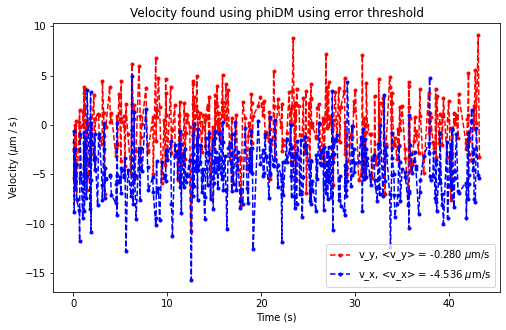

In [31]:
fig,ax = plt.subplots(figsize=(8,8/1.618))

#Locate where the error is less than some limit
w = np.where(phiDM.error < phiDM.err_limit)

ax.plot(phiDM.vtime[w], phiDM.vy[w], '--r.', label='v_y, <v_y> = %.3f $\mu$m/s' % np.mean(phiDM.vy[w]))
ax.plot(phiDM.vtime[w], phiDM.vx[w], '--b.', label='v_x, <v_x> = %.3f $\mu$m/s' % np.mean(phiDM.vx[w]))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity ($\mu$m / s)")
plt.legend(loc=0)
ax.set_title("Velocity found using phiDM using error threshold")
print("With error threshold, magntiude of v = %.3f" % np.sqrt(np.mean(phiDM.vy[w])**2 + np.mean(phiDM.vx[w])**2))
print("Vx +/- stderr = %.3f +/- %.3f" % (np.mean(phiDM.vx[w]),np.std(phiDM.vx[w])/np.sqrt(len(w[0]))))
print("Vy +/- stderr = %.3f +/- %.3f" % (np.mean(phiDM.vy[w]),np.std(phiDM.vy[w])/np.sqrt(len(w[0]))))
print("Vx std deviation = %.3f" % np.std(phiDM.vx[w]))
print("Vy std deviation = %.3f" % np.std(phiDM.vy[w]))

print("median Vx +/- stderr = %.3f +/- %.3f" % (np.median(phiDM.vx[w]),np.std(phiDM.vx[w])/np.sqrt(len(w[0]))))
print("median Vy +/- stderr = %.3f +/- %.3f" % (np.median(phiDM.vy[w]),np.std(phiDM.vy[w])/np.sqrt(len(w[0]))))


## Can we correct for this drift and just get Brownian motion?

The file ./1um_Beads_7ums_ddmmatrix.nc already exists. So perhaps the DDM matrix was calculated already?
Do you still want to calculate the DDM matrix? (y/n): y


2022-06-12 15:03:28,888 - DDM Calculations - Running dt = 1...


Will run DDM computation to correct for velocity...
[6, 0]


2022-06-12 15:03:29,457 - DDM Calculations - Running dt = 5...
2022-06-12 15:03:30,039 - DDM Calculations - Running dt = 11...
2022-06-12 15:03:30,621 - DDM Calculations - Running dt = 24...
2022-06-12 15:03:31,169 - DDM Calculations - Running dt = 51...
2022-06-12 15:03:31,719 - DDM Calculations - Running dt = 110...
2022-06-12 15:03:32,238 - DDM Calculations - Running dt = 234...
2022-06-12 15:03:32,796 - DDM Calculations - Running dt = 497...


DDM matrix took 4.171936511993408 seconds to compute.
 Background estimate ± std is 2.06 ± 0.12


<xarray.Dataset>
Dimensions:           (lagtime: 30, q_y: 64, q_x: 64, q: 32, y: 64, x: 64, frames: 30)
Coordinates:
  * lagtime           (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
    framelag          (frames) int32 1 2 3 4 5 6 7 ... 234 282 341 411 497 599
  * q_y               (q_y) float64 -8.445 -8.181 -7.917 ... 7.653 7.917 8.181
  * q_x               (q_x) float64 -8.445 -8.181 -7.917 ... 7.653 7.917 8.181
  * q                 (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * y                 (y) int32 0 1 2 3 4 5 6 7 8 ... 55 56 57 58 59 60 61 62 63
  * x                 (x) int32 0 1 2 3 4 5 6 7 8 ... 55 56 57 58 59 60 61 62 63
Dimensions without coordinates: frames
Data variables:
    ddm_matrix_full   (lagtime, q_y, q_x) float64 0.5156 0.5552 ... 0.5854
    ddm_matrix        (lagtime, q) float64 0.0 675.4 191.1 ... 2.051 1.894 1.752
    first_image       (y, x) float64 1.185e-06 4.338e-06 ... 4.028e-06 1.056e-06
    alignment_factor  (lagtime, q) float64 nan 6.123e-17 ... -0.128 -0.1232
    avg_image_ft      (q) float64 0.0 5.491e+05 5.108e+04 ... 1.108 1.026 0.9565
    num_pairs_per_dt  (lagtime) int32 286 286 286 286 285 ... 277 265 251 281
    B                 float64 2.06
    B_std             float64 0.1239
    Amplitude         (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    ISF               (lagtime, q) float64 0.0 0.9994 0.9981 ... -18.13 -1.095
Attributes: (12/21)
    units:                   Intensity
    lagtime:                 sec
    q:                       μm$^{-1}$
    x:                       pixels
    y:                       pixels
    info:                    ddm_matrix is the averages of FFT difference ima...
    ...                      ...
    last_lag_time:           600
    binning:                 True
    bin_size:                2
    use_windowing_function:  True
    overlap_method:          1
    number_differences_max:  150

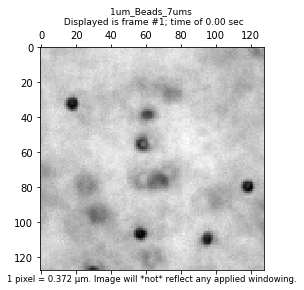

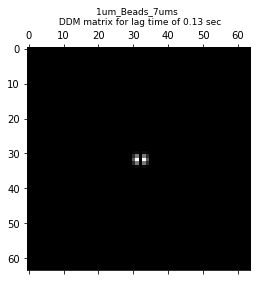

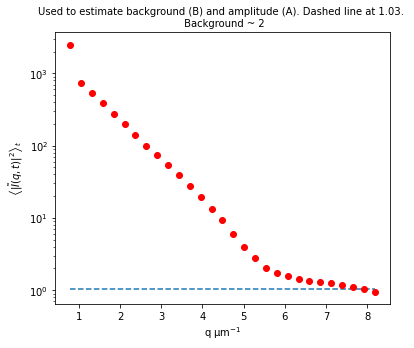

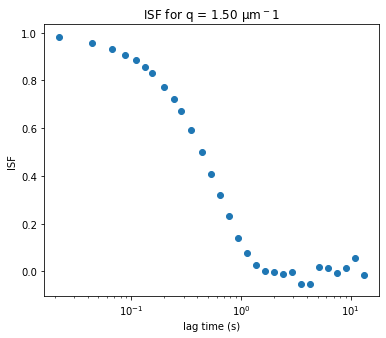

In [32]:
ddm_calc.calculate_DDM_matrix(velocity=[6,0])

,Initial guess,Minimum,Maximum
Amplitude,100.0,1.000,1000000.0
Tau,1.0,0.001,10.0
Background,25000.0,0.000,10000000.0
StretchingExp,1.0,0.500,3.1


Loading file ./1um_Beads_7ums_ddmmatrix.nc ...
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit03'.
In function 'get_tau_vs_q_fit', using new tau...
In hf.plot_one_tau_vs_q function, using new tau... 


<xarray.Dataset>
Dimensions:          (parameter: 4, q: 32, lagtime: 30)
Coordinates:
  * parameter        (parameter) <U13 'Amplitude' 'Tau' ... 'StretchingExp'
  * q                (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * lagtime          (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
Data variables:
    parameters       (parameter, q) float64 1.0 1e+06 1.196e+05 ... 0.5 0.5 0.5
    theory           (lagtime, q) float64 6.032e-09 1.896e+05 ... 2.349 2.232
    isf_data         (lagtime, q) float64 0.0 0.9994 0.9981 ... -18.13 -1.095
    ddm_matrix_data  (lagtime, q) float64 0.0 675.4 191.1 ... 2.051 1.894 1.752
    A                (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    B                float64 2.06
Attributes: (12/18)
    model:                          DDM Matrix - Single Exponential
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 100.0, 'limits': [1.0...
    effective_diffusion_coeff:      0.8569796505916414
    tau_vs_q_slope:                 [-1.66713119]
    msd_alpha:                      [1.19966564]
    ...                             ...
    DataDirectory:                  ./
    FileName:                       1um_Beads_7ums.tif
    pixel_size:                     0.186
    frame_rate:                     45.4
    BackgroundMethod:               0
    OverlapMethod:                  1

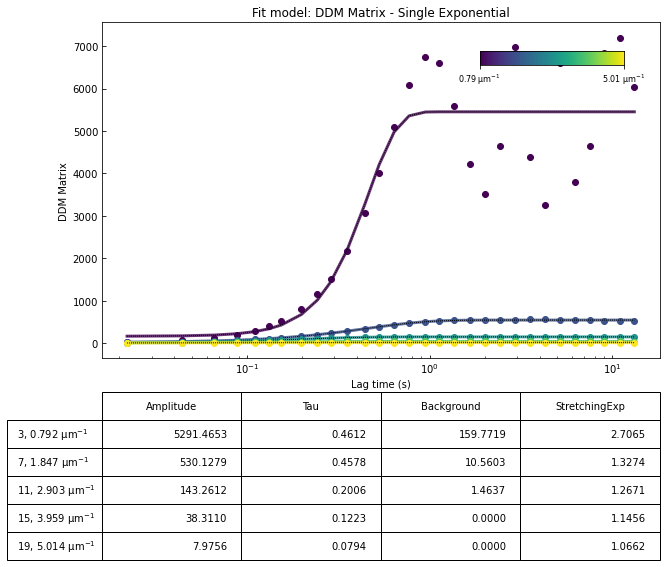

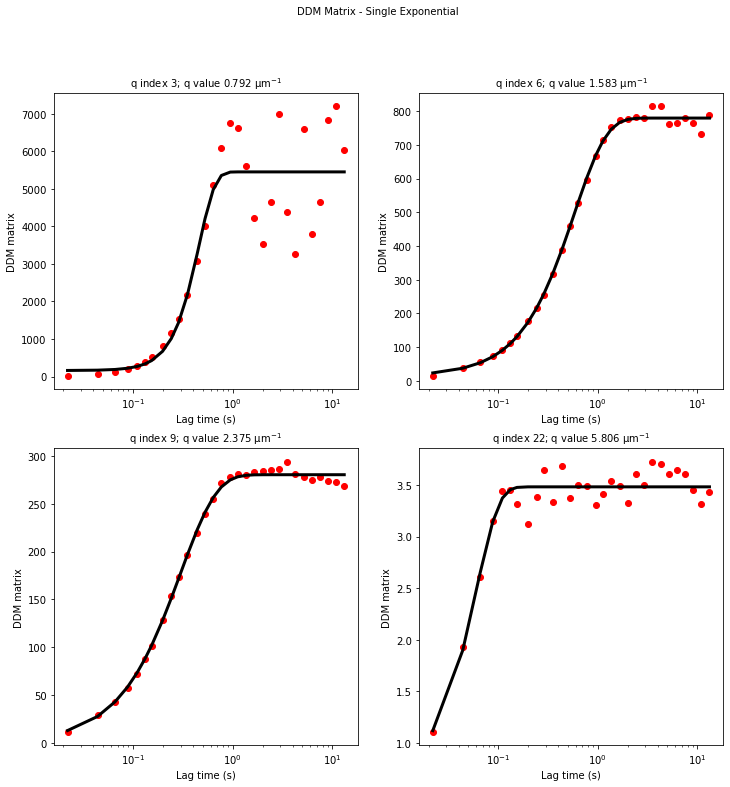

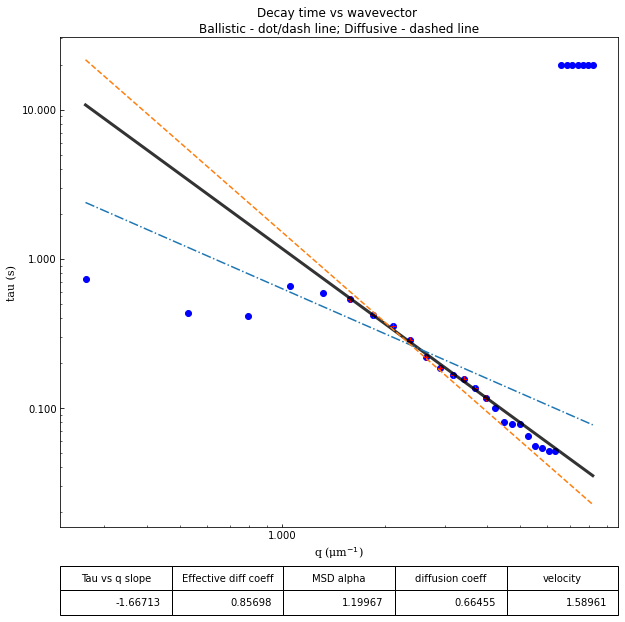

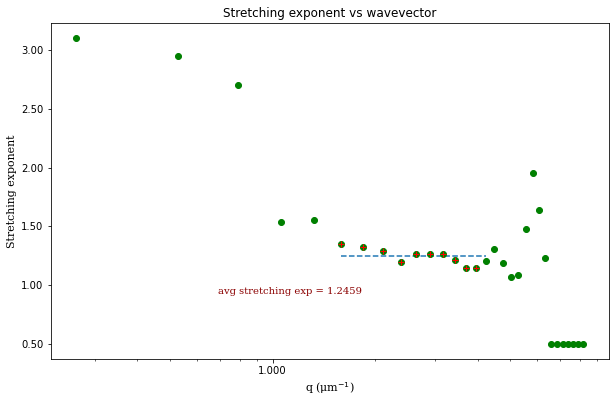

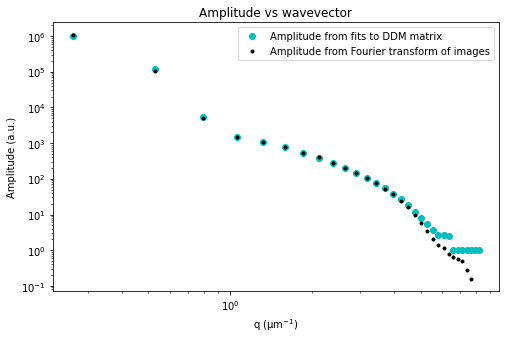

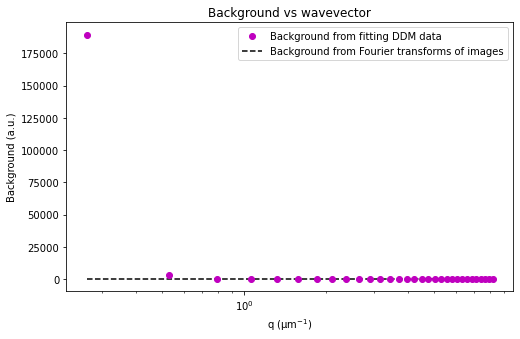

In [33]:
ddm_fit = ddm.DDM_Fit(parameters_as_dictionary)
fit03 = ddm_fit.fit(name_fit = 'fit03', display_table=False)
ddm.fit_report(fit03, q_indices=[3,6,9,22], forced_qs=[6,16], use_new_tau=True, show=True)

<IPython.core.display.Javascript object>


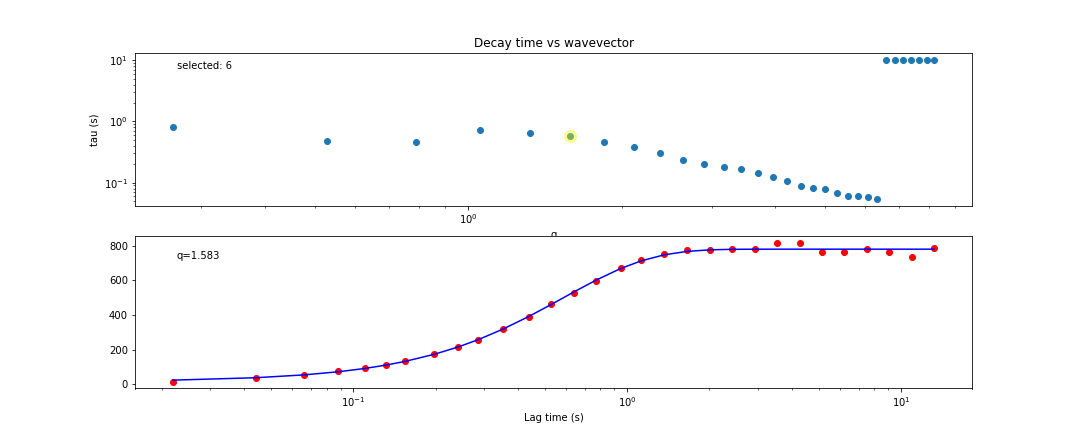

Click on a point in the tau vs q plot to see a fit.
Or press 'N' or 'P' to display next or previous fit.


<IPython.core.display.Javascript object>


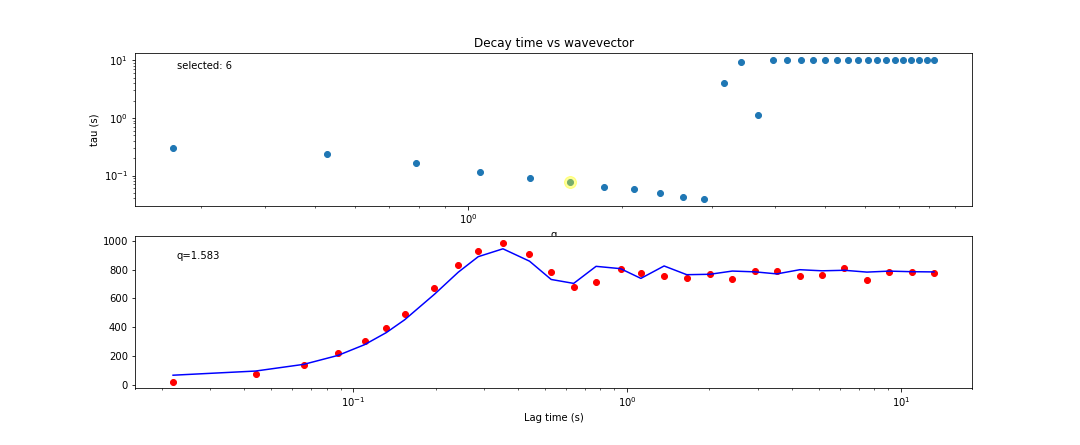

Click on a point in the tau vs q plot to see a fit.
Or press 'N' or 'P' to display next or previous fit.


Text(0, 0.5, 'tau (s)')

In [34]:
%matplotlib notebook
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(15,10/1.618))
browser = ddm.Browse_DDM_Fits(fig, ax, ax2, fit03)

fig.canvas.mpl_connect('pick_event', browser.on_pick)
fig.canvas.mpl_connect('key_press_event', browser.on_press)

ax.set_title('Decay time vs wavevector')
ax.set_xlabel("q")
ax.set_ylabel("tau (s)")

fig2, (ax, ax2) = plt.subplots(2, 1, figsize=(15,10/1.618))
browser2 = ddm.Browse_DDM_Fits(fig2, ax, ax2, fit02)

fig2.canvas.mpl_connect('pick_event', browser2.on_pick)
fig2.canvas.mpl_connect('key_press_event', browser2.on_press)

ax.set_title('Decay time vs wavevector')
ax.set_xlabel("q")
ax.set_ylabel("tau (s)")

In [37]:
%matplotlib inline

## Another approach to dealing with anisotropic dynamics

The file ./1um_Beads_7ums_ddmmatrix.nc already exists. So perhaps the DDM matrix was calculated already?
Do you still want to calculate the DDM matrix? (y/n): y


2022-06-12 15:04:45,799 - DDM Calculations - Running dt = 1...
2022-06-12 15:04:46,528 - DDM Calculations - Running dt = 5...
2022-06-12 15:04:47,422 - DDM Calculations - Running dt = 11...
2022-06-12 15:04:48,282 - DDM Calculations - Running dt = 24...
2022-06-12 15:04:48,967 - DDM Calculations - Running dt = 51...
2022-06-12 15:04:49,572 - DDM Calculations - Running dt = 110...
2022-06-12 15:04:50,184 - DDM Calculations - Running dt = 234...
2022-06-12 15:04:50,732 - DDM Calculations - Running dt = 497...


DDM matrix took 5.193192720413208 seconds to compute.
 Background estimate ± std is 2.06 ± 0.12


<IPython.core.display.Javascript object>


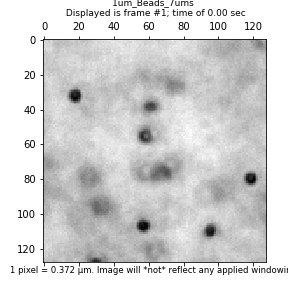

<IPython.core.display.Javascript object>


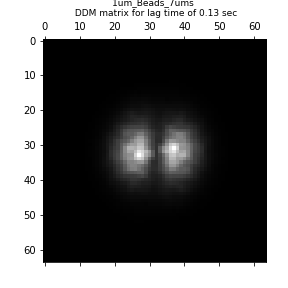

<IPython.core.display.Javascript object>


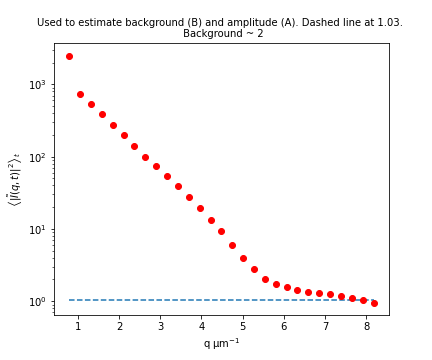

<IPython.core.display.Javascript object>


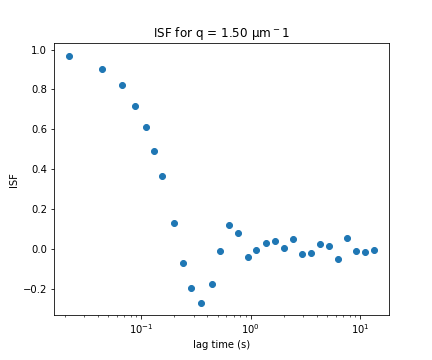

<xarray.Dataset>
Dimensions:           (lagtime: 30, q_y: 64, q_x: 64, q: 32, y: 64, x: 64, frames: 30)
Coordinates:
  * lagtime           (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
    framelag          (frames) int32 1 2 3 4 5 6 7 ... 234 282 341 411 497 599
  * q_y               (q_y) float64 -8.445 -8.181 -7.917 ... 7.653 7.917 8.181
  * q_x               (q_x) float64 -8.445 -8.181 -7.917 ... 7.653 7.917 8.181
  * q                 (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * y                 (y) int32 0 1 2 3 4 5 6 7 8 ... 55 56 57 58 59 60 61 62 63
  * x                 (x) int32 0 1 2 3 4 5 6 7 8 ... 55 56 57 58 59 60 61 62 63
Dimensions without coordinates: frames
Data variables:
    ddm_matrix_full   (lagtime, q_y, q_x) float64 0.4972 0.526 ... 0.5529 0.5726
    ddm_matrix        (lagtime, q) float64 0.0 11.94 16.09 ... 1.934 1.776 1.671
    first_image       (y, x) float64 1.185e-06 4.338e-06 ... 4.028e-06 1.056e-06
    alignment_factor  (lagtime, q) float64 nan 6.123e-17 ... -0.132 -0.1375
    avg_image_ft      (q) float64 0.0 5.491e+05 5.108e+04 ... 1.108 1.026 0.9565
    num_pairs_per_dt  (lagtime) int32 286 286 286 286 285 ... 277 265 251 281
    B                 float64 2.06
    B_std             float64 0.1239
    Amplitude         (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    ISF               (lagtime, q) float64 0.0 1.0 0.9999 ... -31.62 -1.647
Attributes: (12/21)
    units:                   Intensity
    lagtime:                 sec
    q:                       μm$^{-1}$
    x:                       pixels
    y:                       pixels
    info:                    ddm_matrix is the averages of FFT difference ima...
    ...                      ...
    last_lag_time:           600
    binning:                 True
    bin_size:                2
    use_windowing_function:  True
    overlap_method:          1
    number_differences_max:  150

In [36]:
ddm_calc.calculate_DDM_matrix()

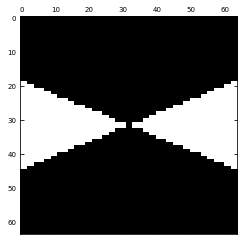

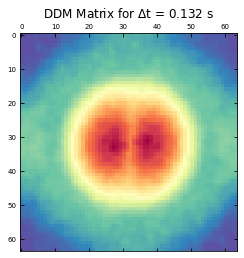

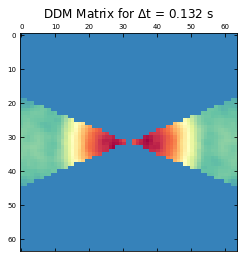

In [47]:
centralAngle = 90 #100 or 10
angRange = 45
mask = ddm.ddm.generate_mask(np.empty((64,64)), centralAngle, angRange)

plt.figure(figsize=(4,4))
plt.matshow(mask, fignum=0, cmap='gray')
ax = plt.gca()
ax.tick_params(axis='both', direction='in', which='both', right=True, top=True, labelsize=7)

plt.figure(figsize=(4,4))
timelag = 5
log_of_ddm_mat = np.log(ddm_calc.ddm_dataset.ddm_matrix_full[timelag])
plt.matshow(log_of_ddm_mat, cmap=matplotlib.cm.Spectral_r, fignum=0, vmin=-0.7, vmax=6.8)
plt.title("DDM Matrix for $\Delta$t = %.3f s" % ddm_calc.ddm_dataset.lagtime[timelag])
ax = plt.gca()
ax.tick_params(axis='both', direction='in', which='both', right=True, top=True, labelsize=7)

plt.figure(figsize=(4,4))
timelag = 5
log_of_ddm_mat = np.log(ddm_calc.ddm_dataset.ddm_matrix_full[timelag])
plt.matshow(mask*log_of_ddm_mat, cmap=matplotlib.cm.Spectral_r, fignum=0, vmin=-0.7, vmax=6.8)
plt.title("DDM Matrix for $\Delta$t = %.3f s" % ddm_calc.ddm_dataset.lagtime[timelag])
ax = plt.gca()
ax.tick_params(axis='both', direction='in', which='both', right=True, top=True, labelsize=7)


,Initial guess,Minimum,Maximum
Amplitude,100.0,1.000,1000000.0
Tau,1.0,0.001,10.0
Background,25000.0,0.000,10000000.0
StretchingExp,1.0,0.500,3.1


Parameter 'StretchingExp' set to 2.
Parameter 'StretchingExp' lower limit set to 1.
Parameter 'StretchingExp' upper limit set to 2.1.
Parameter 'Background' set to 0.5.
Parameter 'Background' lower limit set to 0.
Parameter 'Background' upper limit set to 100.
Parameter 'Amplitude' set to 5.
Parameter 'Tau' set to 0.05.
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit05'.
In function 'get_tau_vs_q_fit', using new tau...
In hf.plot_one_tau_vs_q function, using new tau... 


<xarray.Dataset>
Dimensions:          (parameter: 4, q: 32, lagtime: 30, time: 30)
Coordinates:
  * parameter        (parameter) <U13 'Amplitude' 'Tau' ... 'StretchingExp'
  * q                (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * lagtime          (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
Dimensions without coordinates: time
Data variables:
    parameters       (parameter, q) float64 1.0 1.86e+03 1.522e+03 ... 1.0 1.0
    theory           (lagtime, q) float64 2.631e-06 15.49 3.775 ... 1.0 1.0 1.0
    isf_data         (lagtime, q) float64 0.0 1.0 0.9999 ... 1.811 -31.62 -1.647
    ddm_matrix_data  (time, q) float64 0.0 4.051 7.251 ... 0.6555 0.5717 0.5982
    A                (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    B                float64 2.06
Attributes: (12/18)
    model:                          DDM Matrix - Single Exponential
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 5.0, 'limits': [1.0, ...
    effective_diffusion_coeff:      6.280818337329273
    tau_vs_q_slope:                 [-1.15347741]
    msd_alpha:                      [1.73388744]
    ...                             ...
    DataDirectory:                  ./
    FileName:                       1um_Beads_7ums.tif
    pixel_size:                     0.186
    frame_rate:                     45.4
    BackgroundMethod:               0
    OverlapMethod:                  1

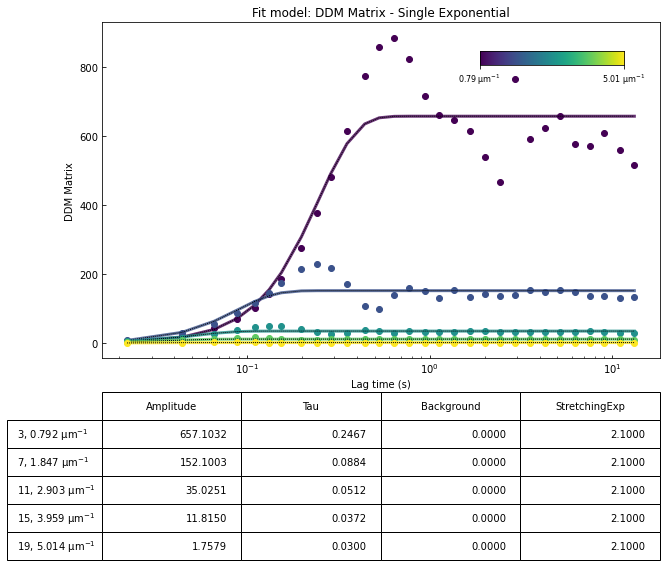

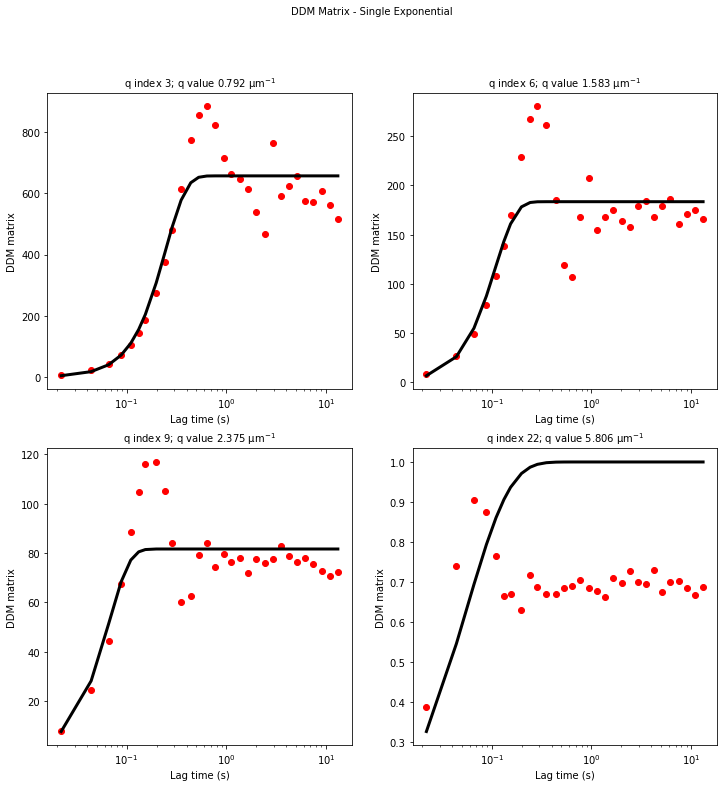

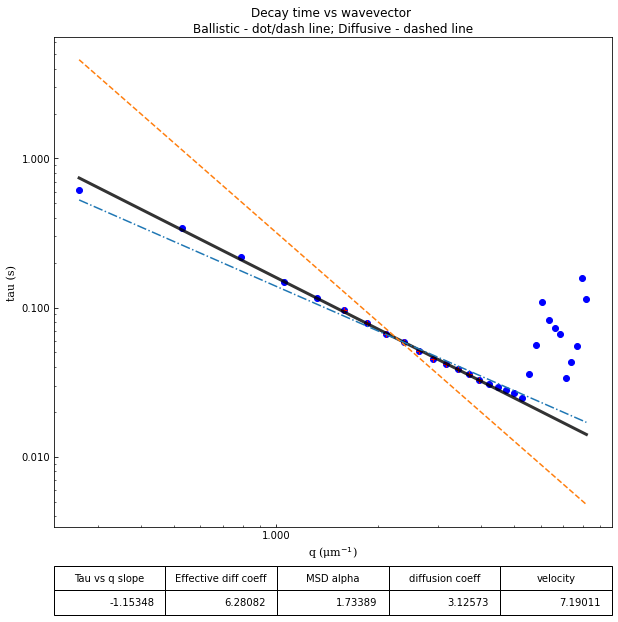

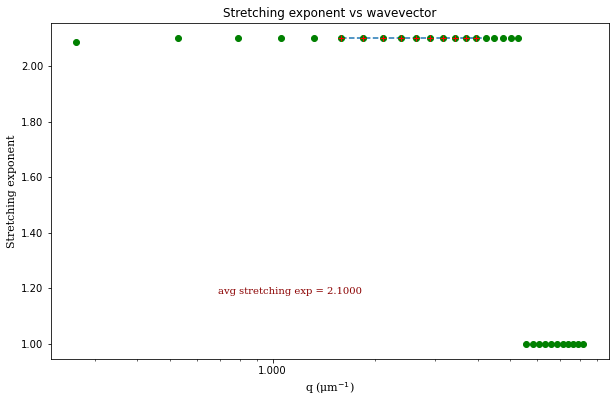

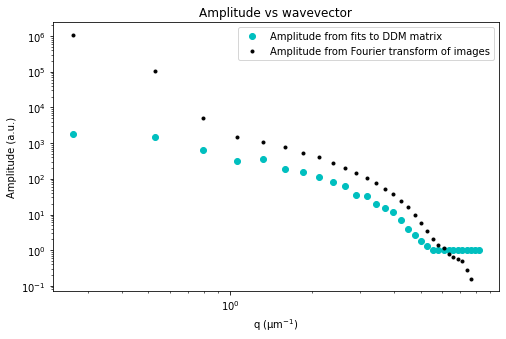

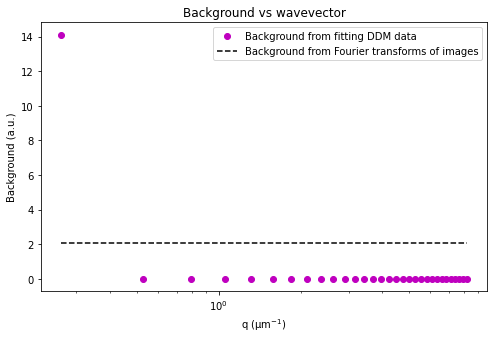

In [56]:
ddm_fit.reload_fit_model_by_name("DDM Matrix - Single Exponential")
ddm_fit.set_parameter_initial_guess("StretchingExp", 2)
ddm_fit.set_parameter_bounds("StretchingExp", [1,2.1])
ddm_fit.set_parameter_initial_guess("Background", 0.5)
ddm_fit.set_parameter_bounds("Background", [0,100])
ddm_fit.set_parameter_initial_guess("Amplitude", 5)
ddm_fit.set_parameter_initial_guess("Tau", 0.05)

new_radav_pvdir = ddm.ddm.radial_avg_ddm_matrix(ddm_calc.ddm_dataset.ddm_matrix_full, 
                                          centralAngle=centralAngle, angRange=angRange)
ddm_fit.ddm_dataset['ddm_matrix'] = (['time','q'], new_radav_pvdir)

fit05 = ddm_fit.fit(name_fit = 'fit05', display_table=False)
ddm.fit_report(fit05, q_indices=[3,6,9,22], forced_qs=[6,16], use_new_tau=True, show=True)